In [20]:
import pandas as pd
from sklearn.utils import shuffle
import os
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import os
from skimage import io
import torch
from torchvision import transforms
import torchvision
from skimage import color
import copy

import time
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, models
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
from skimage import io, transform
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
import scipy
import random
import pickle
import scipy.io as sio
import itertools
from scipy.ndimage.interpolation import shift
import copy
import warnings
#warnings.filterwarnings("ignore")
plt.ion()
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pydicom

In [49]:
root_dir = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis/HPC_graphs/'
root_dir_full_data = '/Users/nhungle/Box/Free/Data-Science-Projects/Breast_Cancer_Diagnosis/HPC_graphs/Full_Data'

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_plot(y_target, y_score, model): 

    fpr, tpr, _ = roc_curve(y_target, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    fig = plt.figure()
    

    plt.title('Receiver Operating Characteristic of {}'.format(model))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    fig.savefig(os.path.join(root_dir, 'AUC of {} model.png'.format(model)))
                
    plt.show()

In [50]:
## Plot ROC curve for ResNet18
y_score_resnet18 = []
y_target_resnet18 = []
f_score = open(os.path.join(root_dir_full_data, "y_score_resnet18_tl.txt"), "r")
f_target = open(os.path.join(root_dir_full_data, "y_target_resnet18_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet18.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet18.append(float(line))
#print(y_score)

In [51]:
len(y_score_resnet18)

645

In [52]:
## Plot ROC curve for ResNet34
y_score_resnet34 = []
y_target_resnet34 = []
f_score = open(os.path.join(root_dir_full_data, "y_score_resnet34_tl.txt"), "r")
f_target = open(os.path.join(root_dir_full_data, "y_target_resnet34_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet34.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet34.append(float(line))

In [53]:
len(y_score_resnet34)

645

In [16]:
## Plot ROC curve for ResNet50
y_score_resnet50 = []
y_target_resnet50 = []
f_score = open(os.path.join(root_dir, "y_score_resnet50_tl.txt"), "r")
f_target = open(os.path.join(root_dir, "y_target_resnet50_tl.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_resnet50.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_resnet50.append(float(line))

In [81]:
## Plot ROC curve for Custom CNN Full
y_score_CNN = []
y_target_CNN = []
f_score = open(os.path.join(root_dir, "y_score_CNN_full.txt"), "r")
f_target = open(os.path.join(root_dir, "y_target_CNN_full.txt"), "r")
for i in f_score:
    line = i.rstrip('\n')
    y_score_CNN.append(float(line))
for i in f_target:
    line = i.rstrip('\n')
    y_target_CNN.append(float(line))

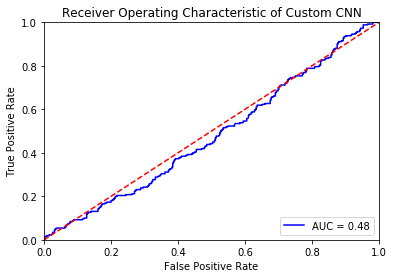

In [82]:
roc_plot(y_target_CNN, y_score_CNN, 'Custom CNN')

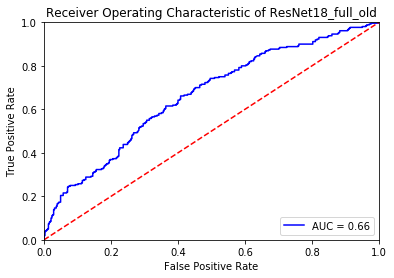

In [54]:
roc_plot(y_target_resnet18, y_score_resnet18, 'ResNet18')

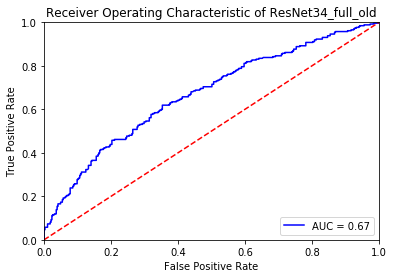

In [55]:
roc_plot(y_target_resnet34, y_score_resnet34, 'ResNet34_full_old')

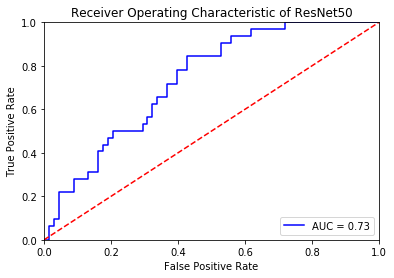

In [56]:
roc_plot(y_target_resnet50, y_score_resnet50, 'ResNet50')

## Accuracy

In [38]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          model,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig('Confusion Matrix of {}'.format(model))
    plt.show()


In [87]:
#y_score_CNN

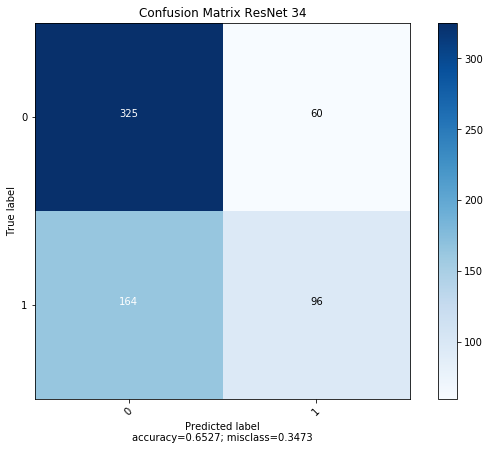

In [95]:
from sklearn.metrics import confusion_matrix
THRESHOLD = 0.54
cm = confusion_matrix(y_target_resnet34, [int(y > THRESHOLD) for y in y_score_resnet34])
#cm = confusion_matrix(y_target, y_pred)
plot_confusion_matrix(cm, 
                      model = 'ResNet34',
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix ResNet 34")
